# Loading Trade History for Squid Ink - Round 2

This notebook focuses on loading and examining the trade history data for Squid Ink in Round 2.

In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configure plots to be larger and more readable
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Try to import seaborn for better styling
try:
    import seaborn as sns
    sns.set(style="whitegrid")
    print("Using Seaborn for plot styling")
except ImportError:
    print("Seaborn not available, using matplotlib default styling")

Using Seaborn for plot styling


## 1. Define Functions to Load Trade History Data

First, let's define functions to load the trade history data for Round 2.

In [2]:
def load_trade_data(round_num, day_num):
    """
    Load trade data for a specific round and day.

    Parameters:
        round_num (int): Round number
        day_num (int): Day number

    Returns:
        pd.DataFrame: DataFrame with trade data
    """
    # Path to data directory - try multiple possible locations
    possible_data_paths = [
        '../../../Prosperity 3 Data',
        '../../../../Prosperity 3 Data',
        '../../../../../Prosperity 3 Data',
        'Prosperity 3 Data'
    ]
    
    # Find the first valid data path
    data_path = None
    for path in possible_data_paths:
        if os.path.exists(path):
            data_path = path
            print(f"Found data directory at {path}")
            break
    
    if data_path is None:
        print("Could not find data directory")
        return pd.DataFrame()
    
    # Construct file path
    filename = f"Round {round_num}/trades_round_{round_num}_day_{day_num}.csv"
    filepath = os.path.join(data_path, filename)
    
    # Check if file exists
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return pd.DataFrame()
    
    # Load the data into a pandas DataFrame
    print(f"Loading {filepath}...")
    data = pd.read_csv(filepath, sep=';')
    print(f"Loaded {len(data)} trade records")
    
    return data

def load_all_trade_data(round_num):
    """
    Load all trade data for a specific round.

    Parameters:
        round_num (int): Round number

    Returns:
        pd.DataFrame: DataFrame with all trade data
    """
    all_data = pd.DataFrame()
    count = 0
    
    for day in range(-1, 2):  # Days -1, 0, 1
        try:
            data = load_trade_data(round_num, day)
            if len(data) > 0:
                count += 1
                # Add day offset to timestamp for continuity
                data['timestamp'] += np.power(10, 6) * (count-1)
                all_data = pd.concat([all_data, data])
        except Exception as e:
            print(f"Error loading trade data for Round {round_num}, Day {day}: {e}")
    
    print(f"Total trade records loaded: {len(all_data)}")
    return all_data

## 2. Load Trade History Data for Round 2

Now, let's load the trade history data for Round 2.

In [3]:
# Load all trade data for Round 2
trades = load_all_trade_data(2)

# Display the first few rows
trades.head()

Found data directory at ../../../../Prosperity 3 Data
Loading ../../../../Prosperity 3 Data\Round 2/trades_round_2_day_-1.csv...
Loaded 12144 trade records
Found data directory at ../../../../Prosperity 3 Data
Loading ../../../../Prosperity 3 Data\Round 2/trades_round_2_day_0.csv...
Loaded 12095 trade records
Found data directory at ../../../../Prosperity 3 Data
Loading ../../../../Prosperity 3 Data\Round 2/trades_round_2_day_1.csv...
Loaded 12015 trade records
Total trade records loaded: 36254


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,KELP,SEASHELLS,2029.0,13
1,0,NaN,NaN,KELP,SEASHELLS,2029.0,1
2,0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,13
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,1
4,100,NaN,NaN,CROISSANTS,SEASHELLS,4304.0,6


In [4]:
# Check the columns in the dataframe
print("Columns in the trade data:")
trades.columns

Columns in the trade data:


Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity'],
      dtype='object')

In [5]:
# Check for missing values
print("Missing values in each column:")
trades.isnull().sum()

Missing values in each column:


timestamp        0
buyer        36254
seller       36254
symbol           0
currency         0
price            0
quantity         0
dtype: int64

## 3. Filter for Squid Ink Trades

Let's filter the trade data to focus only on Squid Ink trades.

In [6]:
# Filter for Squid Ink trades
squid_trades = trades[trades['symbol'] == 'SQUID_INK'].copy()

# Display basic information
print(f"Total number of Squid Ink trades: {len(squid_trades)}")
print(f"Percentage of all trades: {len(squid_trades) / len(trades) * 100:.2f}%")

# Display the first few rows
squid_trades.head()

Total number of Squid Ink trades: 8838
Percentage of all trades: 24.38%


,timestamp,buyer,seller,symbol,currency,price,quantity
2,0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,13
3,0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,1
16,1700,NaN,NaN,SQUID_INK,SEASHELLS,2009.0,8
19,1900,NaN,NaN,SQUID_INK,SEASHELLS,2010.0,1
23,2400,NaN,NaN,SQUID_INK,SEASHELLS,2009.0,1


## 4. Basic Analysis of Squid Ink Trades

Let's perform some basic analysis of the Squid Ink trade data.

In [7]:
# Basic statistics on trade prices
print("Statistics on Squid Ink trade prices:")
print(squid_trades['price'].describe())

# Basic statistics on trade quantities
print("\nStatistics on Squid Ink trade quantities:")
print(squid_trades['quantity'].describe())

Statistics on Squid Ink trade prices:
count    8838.000000
mean     1922.379950
std        47.885919
min      1736.000000
25%      1887.000000
50%      1922.000000
75%      1958.000000
max      2044.000000
Name: price, dtype: float64

Statistics on Squid Ink trade quantities:
count    8838.000000
mean        2.852229
std         3.339000
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: quantity, dtype: float64


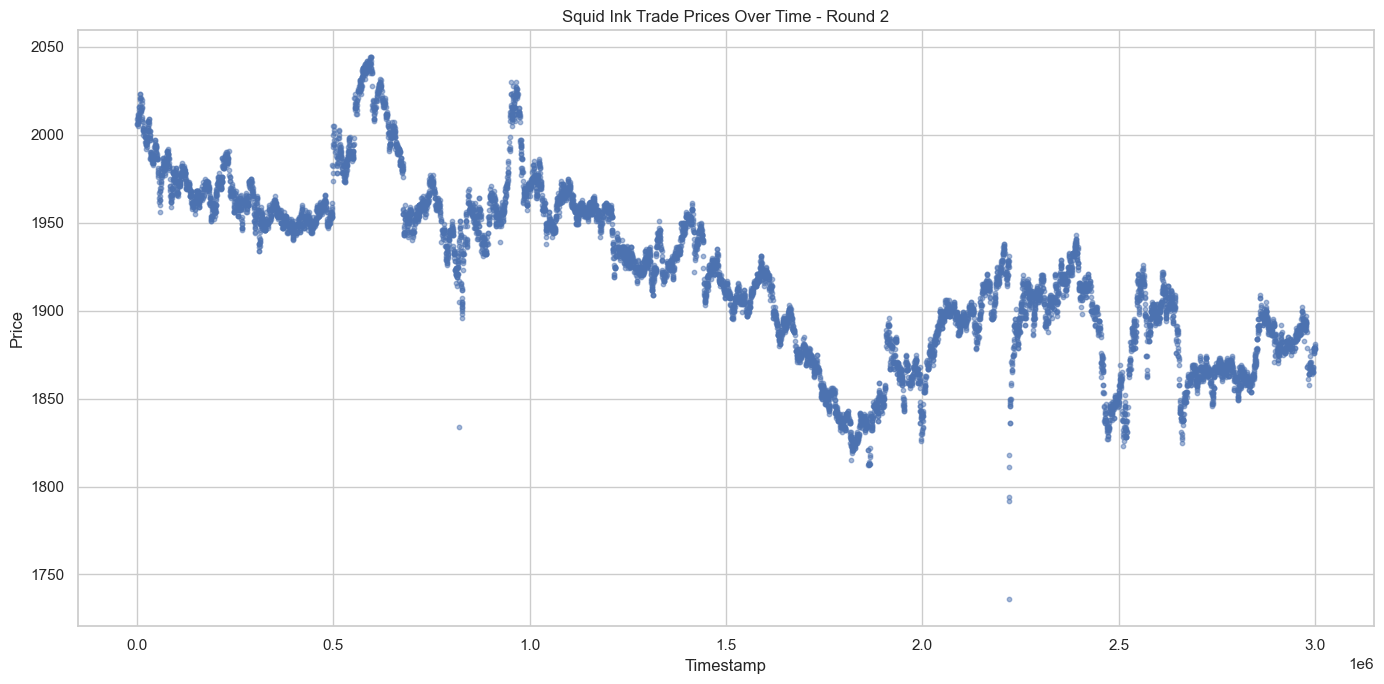

In [8]:
# Plot trade prices over time
plt.figure(figsize=(14, 7))
plt.scatter(squid_trades['timestamp'], squid_trades['price'], alpha=0.5, s=10)
plt.title('Squid Ink Trade Prices Over Time - Round 2')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

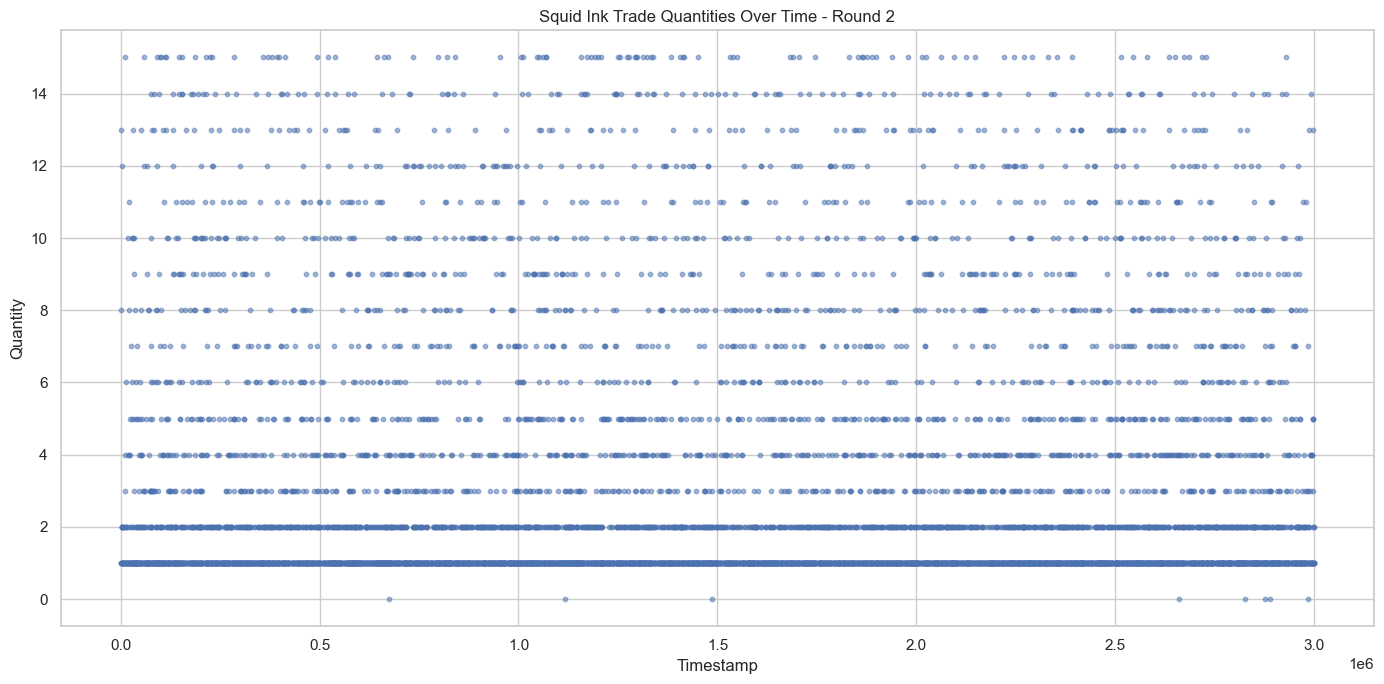

In [9]:
# Plot trade quantities over time
plt.figure(figsize=(14, 7))
plt.scatter(squid_trades['timestamp'], squid_trades['quantity'], alpha=0.5, s=10)
plt.title('Squid Ink Trade Quantities Over Time - Round 2')
plt.xlabel('Timestamp')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\fujos\AppData\Local\Temp\ipykernel_51044\1594734839.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vwap = squid_trades.groupby('timestamp').apply(


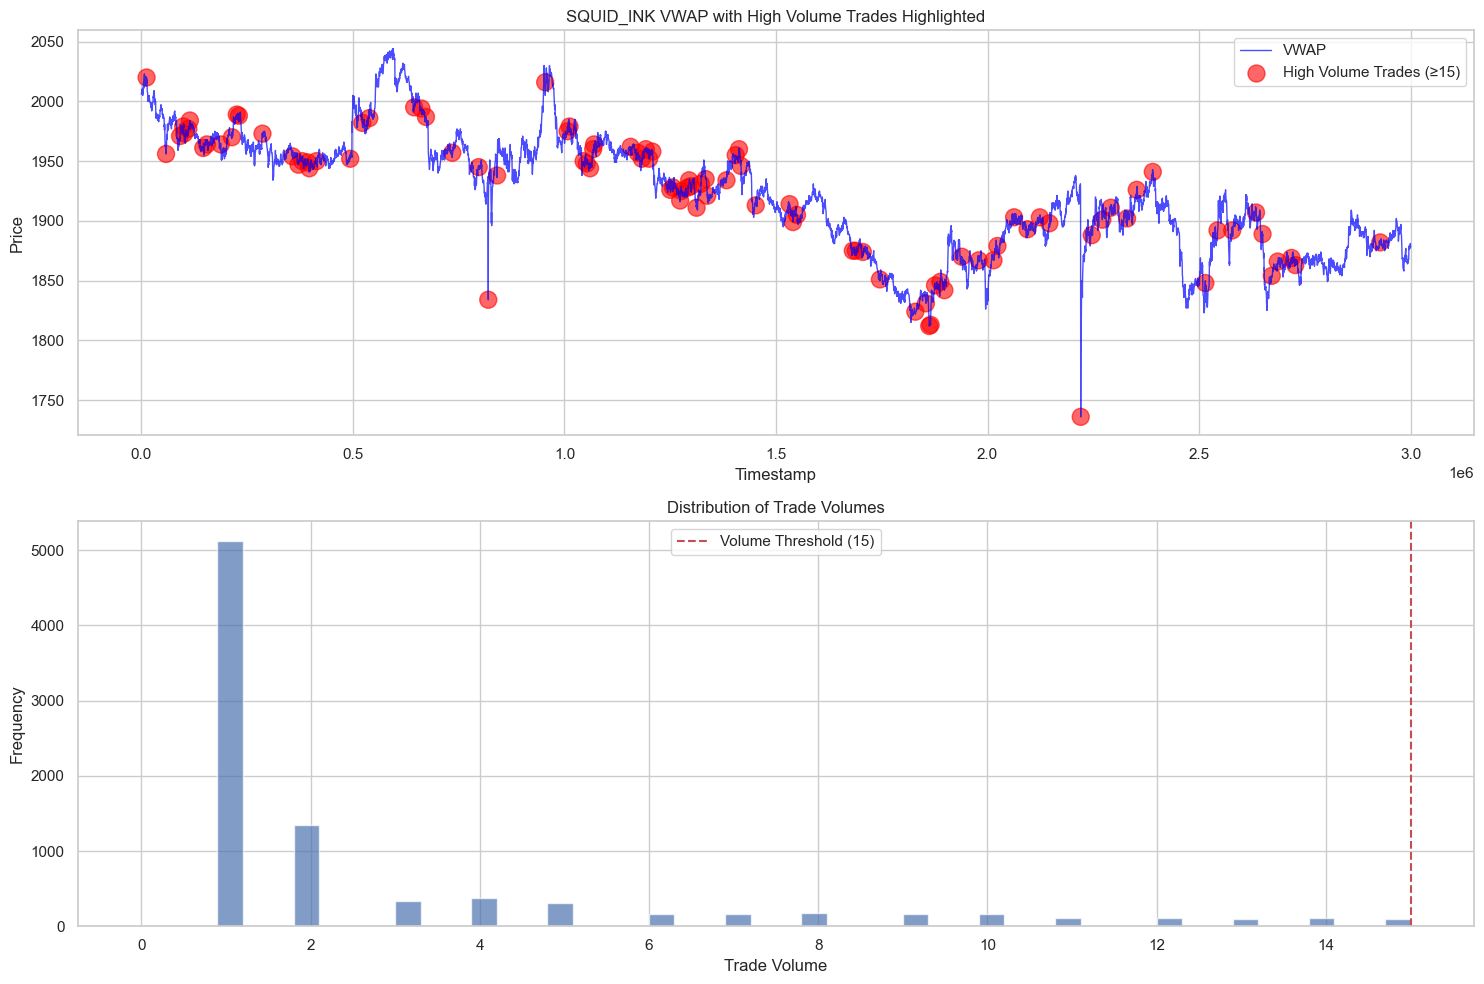


High Volume Trade Analysis:
Total number of trades: 8838
Number of high volume trades: 99
Percentage of high volume trades: 1.12%

Price Impact Analysis:
Average price impact after high volume trades: -0.06%
Median price impact after high volume trades: 0.03%

Largest Volume Trades:
       timestamp   price  quantity  price_impact
152        12400  2020.0        15     -3.168317
11372    1939100  1870.0        15     -0.160428
10800    1888400  1849.0        15     -0.378583
10626    1875800  1846.0        15      0.162514
10497    1865400  1813.0        15      1.820188
10460    1862100  1812.0        15      0.055188
10348    1854300  1831.0        15     -1.037684
10100    1829300  1824.0        15      0.383772
9060     1745600  1851.0        15     -1.458671
8580     1705200  1874.0        15     -1.227321


In [28]:
# Define high volume trades (threshold = 15)
high_volume_trades = squid_trades[abs(squid_trades['quantity']) >= 15].copy()

# Calculate VWAP
squid_trades['value'] = squid_trades['price'] * squid_trades['quantity']
vwap = squid_trades.groupby('timestamp').apply(
    lambda x: (x['price'] * abs(x['quantity'])).sum() / abs(x['quantity']).sum()
).reset_index()

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: VWAP with high volume trades highlighted
plt.subplot(2, 1, 1)
# Plot VWAP
plt.plot(vwap['timestamp'], vwap[0], 
         color='blue', alpha=0.7, label='VWAP', linewidth=1)
# Overlay high volume trades
plt.scatter(high_volume_trades['timestamp'], high_volume_trades['price'],
           s=abs(high_volume_trades['quantity'])*10, 
           color='red', alpha=0.6,
           label='High Volume Trades (≥15)')
plt.title('SQUID_INK VWAP with High Volume Trades Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot 2: Volume distribution
plt.subplot(2, 1, 2)
plt.hist(abs(squid_trades['quantity']), bins=50, alpha=0.7)
plt.axvline(x=15, color='r', linestyle='--', label='Volume Threshold (15)')
plt.title('Distribution of Trade Volumes')
plt.xlabel('Trade Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed analysis of high volume trades
print("\nHigh Volume Trade Analysis:")
print(f"Total number of trades: {len(squid_trades)}")
print(f"Number of high volume trades: {len(high_volume_trades)}")
print(f"Percentage of high volume trades: {(len(high_volume_trades)/len(squid_trades))*100:.2f}%")

# Calculate average price impact
high_volume_trades['next_trade_price'] = high_volume_trades['price'].shift(-1)
high_volume_trades['price_impact'] = (high_volume_trades['next_trade_price'] - high_volume_trades['price']) / high_volume_trades['price'] * 100

print("\nPrice Impact Analysis:")
print(f"Average price impact after high volume trades: {high_volume_trades['price_impact'].mean():.2f}%")
print(f"Median price impact after high volume trades: {high_volume_trades['price_impact'].median():.2f}%")

# Display high volume trades sorted by volume
print("\nLargest Volume Trades:")
print(high_volume_trades.sort_values('quantity', key=abs, ascending=False)[
    ['timestamp', 'price', 'quantity', 'price_impact']
].head(10).to_string())

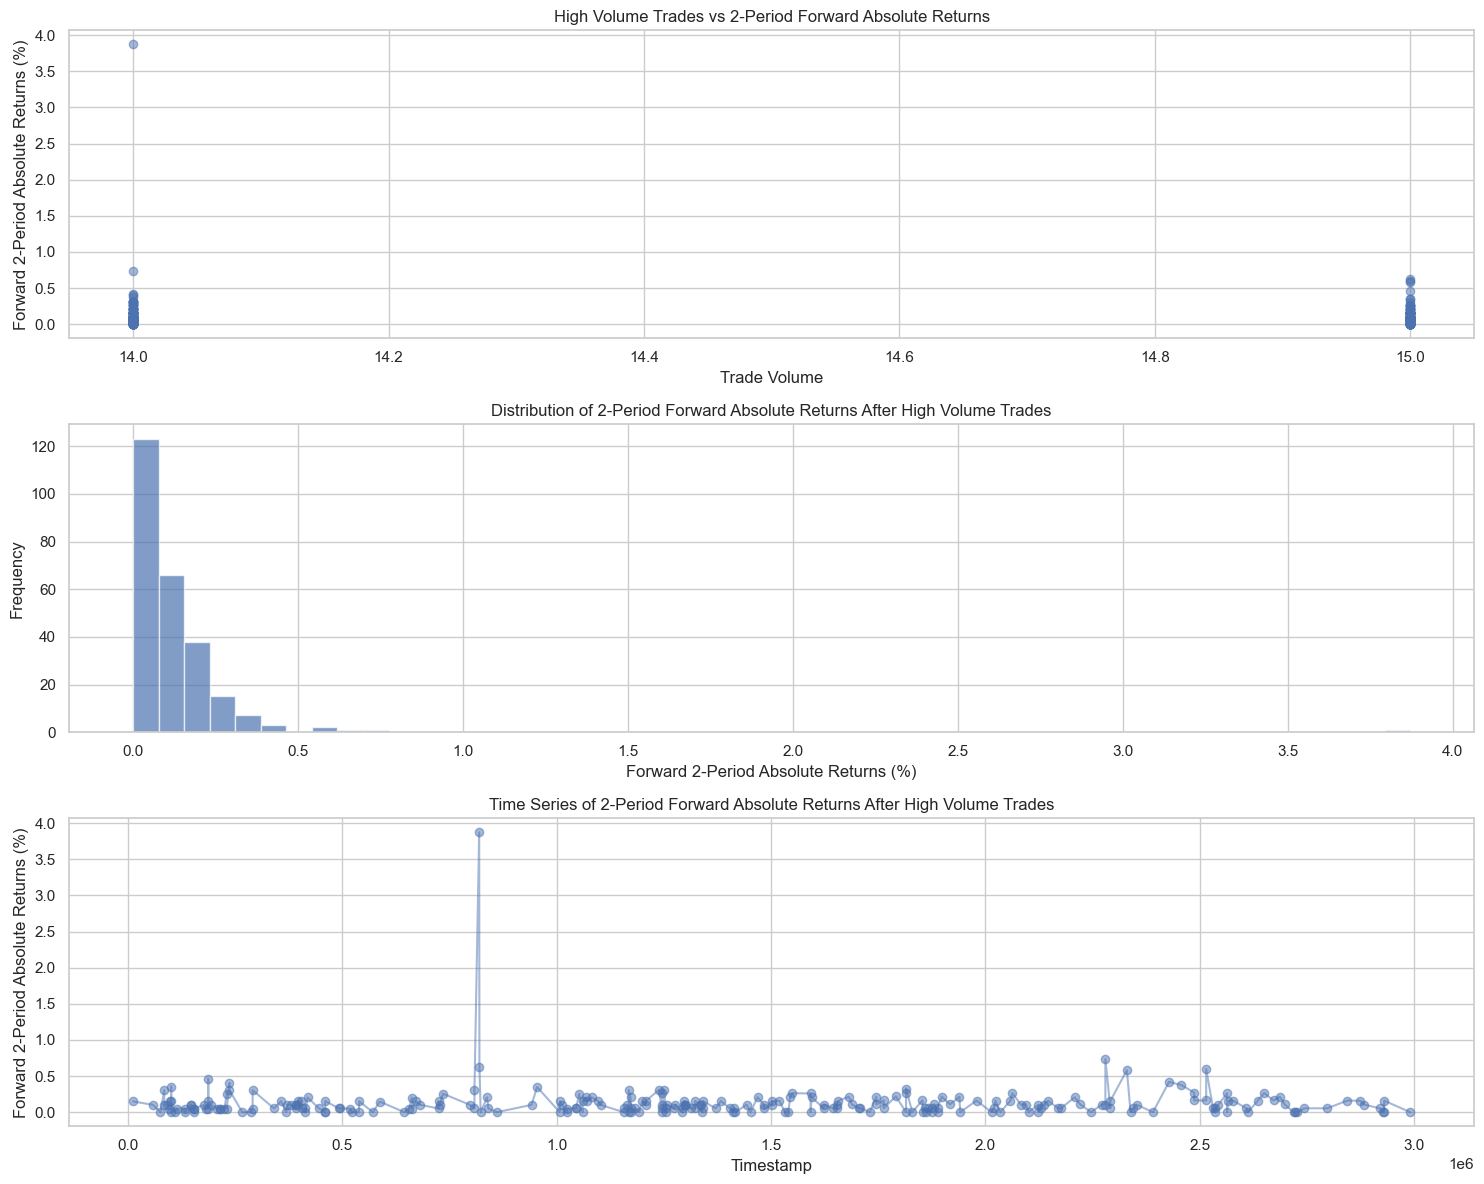


Statistical Analysis of 2-Period Forward Absolute Returns After High Volume Trades:
Number of high volume trades: 257
Mean absolute return: 0.1250%
Median absolute return: 0.1018%
Standard deviation: 0.2610%
95th percentile: 0.3104%

Correlation between trade volume and forward absolute returns: -0.0500

Comparison with Normal Periods:
Mean absolute return after high volume trades: 0.1250%
Mean absolute return during normal periods: 0.1089%
Ratio (high volume / normal): 1.15x


In [16]:
# Define high volume trades (threshold = 14)
high_volume_trades = squid_trades[abs(squid_trades['quantity']) >= 14].copy()

# Sort trades by timestamp to ensure proper lag calculation
squid_trades_sorted = squid_trades.sort_values('timestamp')

# Calculate returns
squid_trades_sorted['returns'] = squid_trades_sorted['price'].pct_change()
squid_trades_sorted['abs_returns'] = abs(squid_trades_sorted['returns'])

# Calculate 2-period forward absolute returns
squid_trades_sorted['forward_2_abs_returns'] = squid_trades_sorted['abs_returns'].shift(-2)

# Merge with high volume trades
high_volume_analysis = high_volume_trades.merge(
    squid_trades_sorted[['timestamp', 'forward_2_abs_returns']], 
    on='timestamp', 
    how='left'
)

# Create visualization
plt.figure(figsize=(15, 12))

# Plot 1: Scatter plot of trade volume vs forward absolute returns
plt.subplot(3, 1, 1)
plt.scatter(abs(high_volume_analysis['quantity']), 
           high_volume_analysis['forward_2_abs_returns'] * 100,  # Convert to percentage
           alpha=0.5)
plt.title('High Volume Trades vs 2-Period Forward Absolute Returns')
plt.xlabel('Trade Volume')
plt.ylabel('Forward 2-Period Absolute Returns (%)')
plt.grid(True)

# Plot 2: Distribution of forward absolute returns after high volume trades
plt.subplot(3, 1, 2)
plt.hist(high_volume_analysis['forward_2_abs_returns'] * 100,  # Convert to percentage
         bins=50, alpha=0.7)
plt.title('Distribution of 2-Period Forward Absolute Returns After High Volume Trades')
plt.xlabel('Forward 2-Period Absolute Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)

# Plot 3: Time series of forward absolute returns after high volume trades
plt.subplot(3, 1, 3)
plt.plot(high_volume_analysis['timestamp'], 
         high_volume_analysis['forward_2_abs_returns'] * 100,  # Convert to percentage
         marker='o', linestyle='-', alpha=0.5)
plt.title('Time Series of 2-Period Forward Absolute Returns After High Volume Trades')
plt.xlabel('Timestamp')
plt.ylabel('Forward 2-Period Absolute Returns (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\nStatistical Analysis of 2-Period Forward Absolute Returns After High Volume Trades:")
print(f"Number of high volume trades: {len(high_volume_analysis)}")
print(f"Mean absolute return: {high_volume_analysis['forward_2_abs_returns'].mean()*100:.4f}%")
print(f"Median absolute return: {high_volume_analysis['forward_2_abs_returns'].median()*100:.4f}%")
print(f"Standard deviation: {high_volume_analysis['forward_2_abs_returns'].std()*100:.4f}%")
print(f"95th percentile: {high_volume_analysis['forward_2_abs_returns'].quantile(0.95)*100:.4f}%")

# Calculate correlation between trade volume and forward absolute returns
correlation = high_volume_analysis['quantity'].abs().corr(high_volume_analysis['forward_2_abs_returns'])
print(f"\nCorrelation between trade volume and forward absolute returns: {correlation:.4f}")

# Compare with normal periods
normal_trades = squid_trades_sorted[abs(squid_trades_sorted['quantity']) < 14]
normal_mean_abs_return = normal_trades['forward_2_abs_returns'].mean()

print("\nComparison with Normal Periods:")
print(f"Mean absolute return after high volume trades: {high_volume_analysis['forward_2_abs_returns'].mean()*100:.4f}%")
print(f"Mean absolute return during normal periods: {normal_mean_abs_return*100:.4f}%")
print(f"Ratio (high volume / normal): {(high_volume_analysis['forward_2_abs_returns'].mean()/normal_mean_abs_return):.2f}x")

Shape of squid_trades: (8838, 8)

First few rows of squid_trades:
    timestamp  buyer  seller     symbol   currency   price  quantity    value
2           0    NaN     NaN  SQUID_INK  SEASHELLS  2006.0        13  26078.0
3           0    NaN     NaN  SQUID_INK  SEASHELLS  2006.0         1   2006.0
16       1700    NaN     NaN  SQUID_INK  SEASHELLS  2009.0         8  16072.0
19       1900    NaN     NaN  SQUID_INK  SEASHELLS  2010.0         1   2010.0
23       2400    NaN     NaN  SQUID_INK  SEASHELLS  2009.0         1   2009.0

Time range in data:
Start: 1970-01-01 00:00:00
End: 1970-01-01 00:00:00.002999700


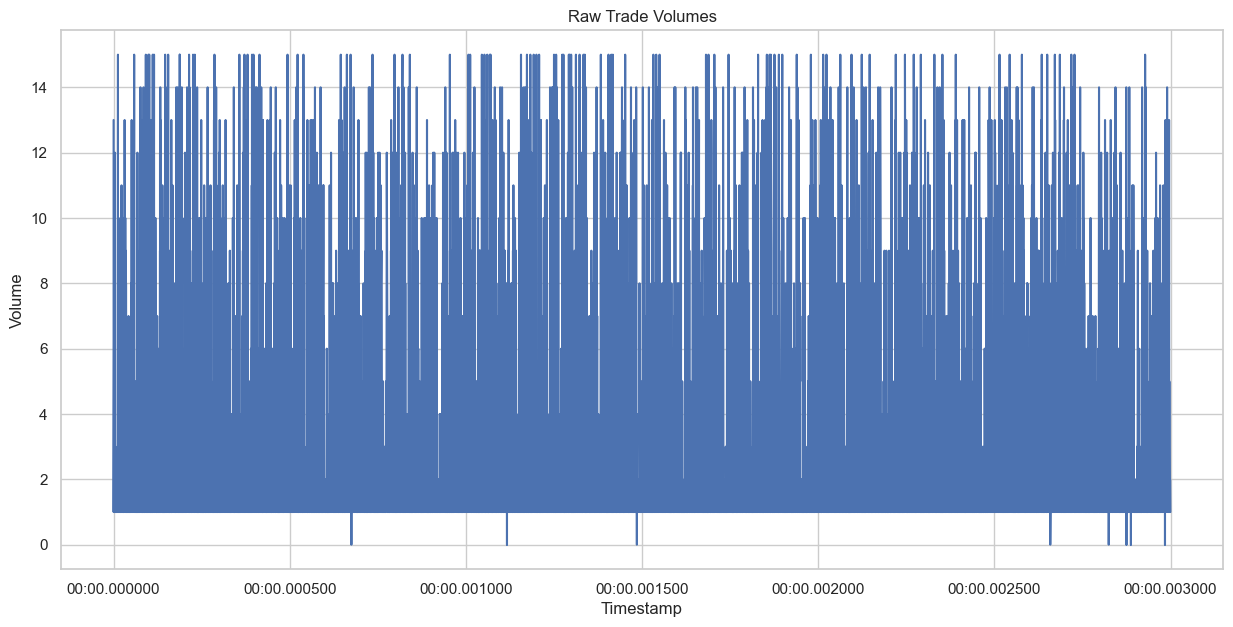


First few rows of resampled 1-min data:
timestamp
1970-01-01    25208
Freq: min, Name: abs_volume, dtype: int64

Number of non-zero values in 1-min data: 1


In [20]:
# First, let's examine the data
print("Shape of squid_trades:", squid_trades.shape)
print("\nFirst few rows of squid_trades:")
print(squid_trades.head())

# Check if we have any data after resampling
squid_trades_indexed = squid_trades.copy()
squid_trades_indexed['timestamp'] = pd.to_datetime(squid_trades_indexed['timestamp'])
squid_trades_indexed.set_index('timestamp', inplace=True)
squid_trades_indexed['abs_volume'] = abs(squid_trades_indexed['quantity'])

# Check the time range
print("\nTime range in data:")
print("Start:", squid_trades_indexed.index.min())
print("End:", squid_trades_indexed.index.max())

# Create a simple plot of raw trade volumes
plt.figure(figsize=(15, 7))
plt.plot(squid_trades_indexed.index, squid_trades_indexed['abs_volume'])
plt.title('Raw Trade Volumes')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Check resampled data
volume_1min = squid_trades_indexed['abs_volume'].resample('1min').sum()
print("\nFirst few rows of resampled 1-min data:")
print(volume_1min.head())
print("\nNumber of non-zero values in 1-min data:", (volume_1min > 0).sum())

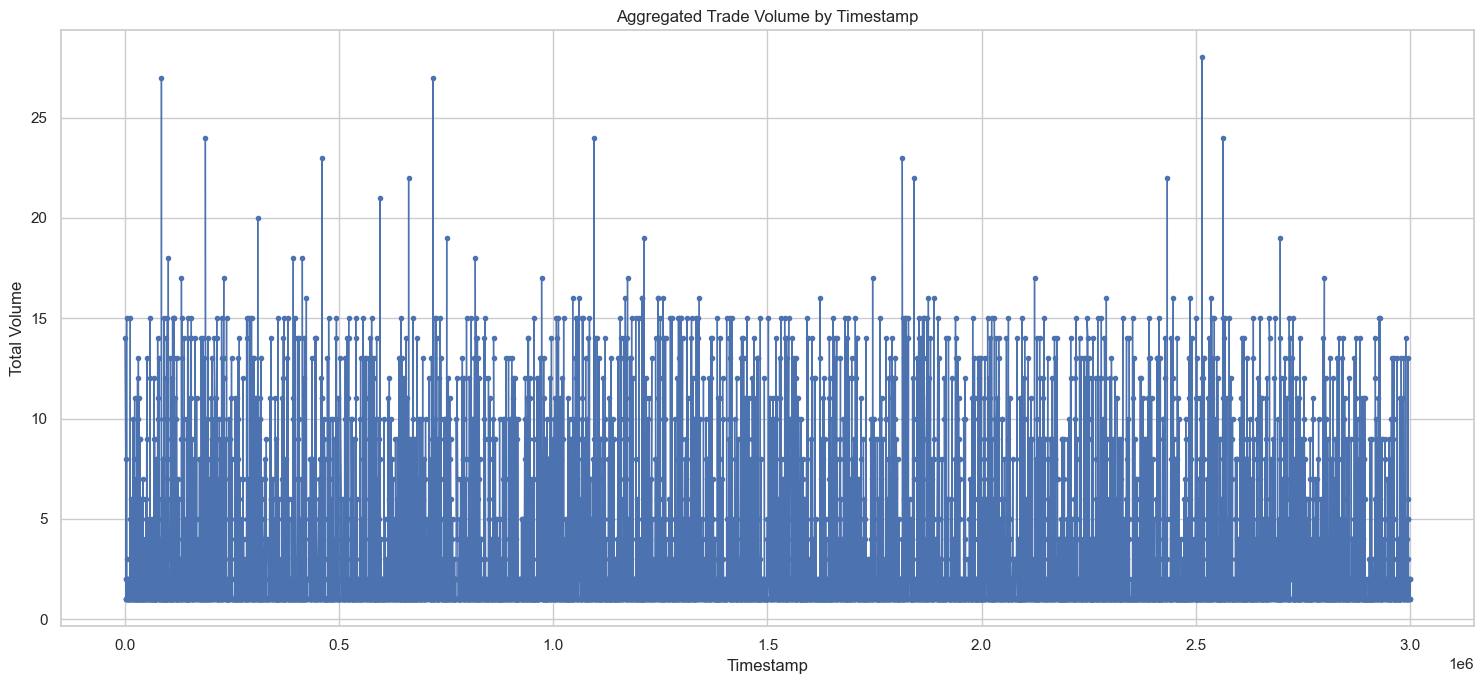


Aggregated Volume Statistics:
count    7693.000000
mean        3.276745
std         3.814978
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        28.000000
Name: quantity, dtype: float64

Number of unique timestamps: 7693


In [23]:
# Group by timestamp and sum absolute volumes
aggregated_volume = squid_trades.groupby('timestamp')['quantity'].apply(lambda x: abs(x).sum()).reset_index()

# Create visualization
plt.figure(figsize=(15, 7))
plt.plot(aggregated_volume['timestamp'], aggregated_volume['quantity'], marker='.', linewidth=1)
plt.title('Aggregated Trade Volume by Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nAggregated Volume Statistics:")
print(aggregated_volume['quantity'].describe())

# Print number of unique timestamps
print(f"\nNumber of unique timestamps: {len(aggregated_volume)}")

C:\Users\fujos\AppData\Local\Temp\ipykernel_51044\1492204405.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vwap = squid_trades.groupby('timestamp').apply(


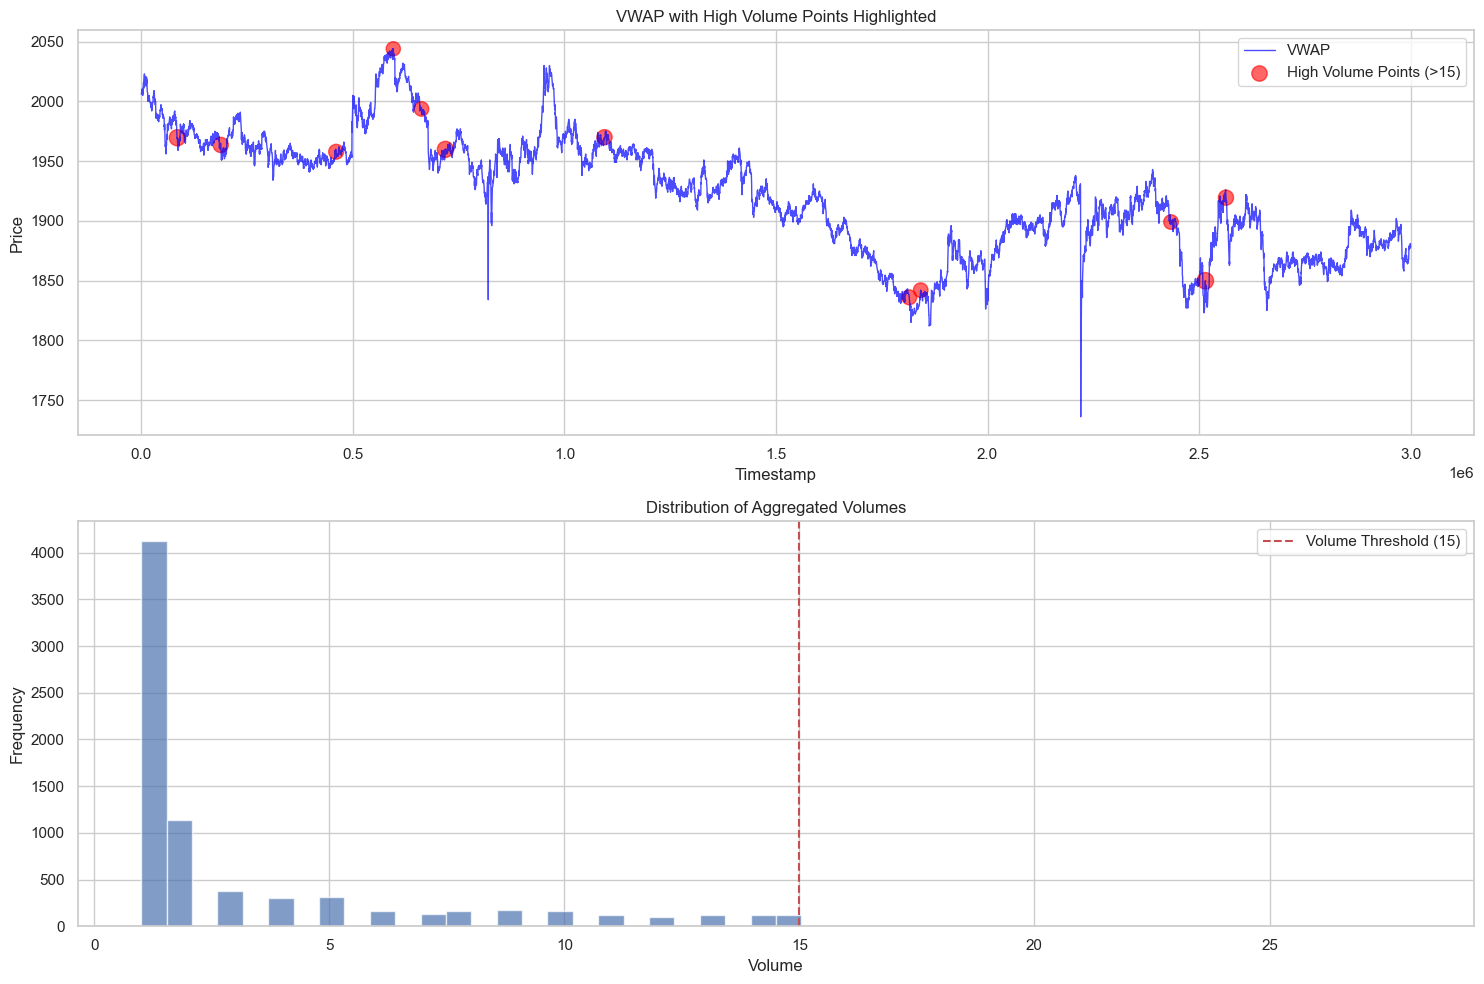


High Volume Points Analysis:
Total number of timestamps: 7693
Number of high volume points: 12
Percentage of high volume points: 0.16%

Volume statistics for high volume points:
count    12.000000
mean     23.916667
std       2.274696
min      21.000000
25%      22.000000
50%      23.500000
75%      24.750000
max      28.000000
Name: quantity, dtype: float64


In [27]:
# Calculate VWAP
squid_trades['value'] = squid_trades['price'] * squid_trades['quantity']
vwap = squid_trades.groupby('timestamp').apply(
    lambda x: (x['price'] * abs(x['quantity'])).sum() / abs(x['quantity']).sum()
).reset_index()

# Calculate aggregated volumes
aggregated_volume = squid_trades.groupby('timestamp')['quantity'].apply(lambda x: abs(x).sum()).reset_index()

# Find high volume points
high_volume_points = aggregated_volume[aggregated_volume['quantity'] > 20]

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: VWAP with high volume points highlighted
plt.subplot(2, 1, 1)
# Plot VWAP
plt.plot(vwap['timestamp'], vwap[0], 
         color='blue', alpha=0.7, label='VWAP', linewidth=1)
# Overlay high volume points
plt.scatter(high_volume_points['timestamp'], 
           vwap[vwap['timestamp'].isin(high_volume_points['timestamp'])][0],
           s=high_volume_points['quantity']*5, 
           color='red', alpha=0.6,
           label='High Volume Points (>15)')
plt.title('VWAP with High Volume Points Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot 2: Volume distribution
plt.subplot(2, 1, 2)
plt.hist(aggregated_volume['quantity'], bins=50, alpha=0.7)
plt.axvline(x=15, color='r', linestyle='--', label='Volume Threshold (15)')
plt.title('Distribution of Aggregated Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics about high volume points
print("\nHigh Volume Points Analysis:")
print(f"Total number of timestamps: {len(aggregated_volume)}")
print(f"Number of high volume points: {len(high_volume_points)}")
print(f"Percentage of high volume points: {(len(high_volume_points)/len(aggregated_volume))*100:.2f}%")
print("\nVolume statistics for high volume points:")
print(high_volume_points['quantity'].describe())

## 5. Save Trade Data for Future Use

Let's save the Squid Ink trade data for future use.

In [10]:
# Create output directory if it doesn't exist
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)

# Save Squid Ink trade data to CSV
output_file = os.path.join(output_dir, 'squid_trades_round2.csv')
squid_trades.to_csv(output_file, index=False)
print(f"Squid Ink trade data saved to {output_file}")

Squid Ink trade data saved to ../data\squid_trades_round2.csv


## 6. Summary

In this notebook, we have:
1. Loaded trade history data for Round 2
2. Filtered for Squid Ink trades
3. Performed basic analysis of Squid Ink trade data
4. Saved the Squid Ink trade data for future use

This data can now be used for further analysis to look for potential trading signals.